In [ ]:
# https://drive.google.com/drive/folders/1a9a3vOCBSD99VrMuvmEs57grqZQtcPi9

# Prática — Módulo 2: Linguagem Natural e Desafios Computacionais


## Prática
O objetivo desta prática é operacionalizar as etapas iniciais do pipeline de PLN a partir de um texto controlado e, em seguida, de um texto real coletado da Wikipedia. O aluno executa tokenização com split(), NLTK e spaCy, compara stemming e lematização, analisa classes gramaticais (POS), reconhecimento de entidades nomeadas (NER), aplica remoção de stopwords e calcula frequência de termos, tornando explícito como cada decisão de pré-processamento altera a representação computacional do texto; não há treinamento de modelos, apenas análise estrutural.

## Dataset
O dataset consiste em um único documento textual em português obtido por requisição HTTP à página da Wikipedia sobre Inteligência Artificial, com extração dos parágrafos HTML e concatenação em uma única string. O texto enciclopédico, formal e tecnicamente denso, é utilizado como corpus de teste para observar como ferramentas de PLN estruturam linguisticamente um texto bruto antes de qualquer etapa de modelagem.


### Pergunta
1.	No texto base definido manualmente, qual é a unidade de análise inicial do experimento? Por que começamos com um texto controlado?

    A unidade de análise inicial é o Token (a palavra ou termo individual).

    Embora a variável texto seja tecnicamente uma string (uma sequência de caracteres) contendo uma frase completa, o objetivo descrito na prática ("executa tokenização", "stemming", "frequência de termos") indica que o algoritmo precisa quebrar essa estrutura maior em unidades menores e atômicas para processamento.

    No contexto do seu código:

    Entrada: Uma frase ("Os pesquisadores...").
    Unidade de Análise: Cada palavra isolada ("Os", "pesquisadores", "estavam").
    
2. Por que começamos com um texto controlado?
    Começar com um texto controlado (hardcoded) em vez de carregar dados externos imediatamente é uma prática fundamental de engenharia de software conhecida como Sanity Check (Verificação de Sanidade) ou criação de um Ground Truth (Verdade Fundamental).

    Aqui estão os motivos técnicos principais:

    Previsibilidade e Validação (Ground Truth): Com a frase "Os pesquisadores estavam analisando...", você sabe exatamente qual deve ser o resultado. Se você aplicar um algoritmo de stemming, você sabe que "analisando" deve virar "analis" ou "analisar". Isso permite verificar se a biblioteca (NLTK/spaCy) está configurada corretamente antes de processar milhares de linhas da Wikipedia.

    Isolamento de Complexidade: Dados reais (como o texto da Wikipedia mencionado no dataset) trazem "ruído": tags HTML, problemas de encoding (UTF-8), pontuação irregular e caracteres especiais. Ao usar um texto controlado, você isola a lógica do algoritmo de PLN dos problemas de limpeza de dados (Data Cleaning).

    Depuração (Debugging): Se o seu código falhar ou der um erro de sintaxe, é muito mais fácil encontrar o problema em uma string de 20 palavras do que em um corpus de 10MB.



In [1]:
# Definir o texto base para experimentos iniciais.
texto = "Os pesquisadores estavam analisando os resultados obtidos pelas pesquisas anteriores e decidiram aplicar modelos estatísticos mais avançados para melhorar as previsões."
texto

'Os pesquisadores estavam analisando os resultados obtidos pelas pesquisas anteriores e decidiram aplicar modelos estatísticos mais avançados para melhorar as previsões.'

### Pergunta
2.	Ao aplicar split(), como o texto é segmentado? Que limitações aparecem imediatamente?

    Como é segmentado: Ao utilizar texto.split() sem argumentos, o Python segmenta a string utilizando espaços em branco (espaços, tabulações ou quebras de linha) como delimitadores. O resultado é uma lista de strings (tokens).

    Limitações Imediatas: A limitação mais crítica e imediata é a aderência da pontuação às palavras. O método split() é "cego" para a gramática; ele apenas procura onde o espaço termina.

    No seu texto base:

    "...para melhorar as previsões."

    O token resultante para a última palavra será 'previsões.' (com o ponto final incluído), e não 'previsões'.

    Isso gera dois problemas principais para a análise de dados:

    Poluição do Vocabulário: O computador tratará 'previsões' e 'previsões.' como duas palavras completamente diferentes.
    
    Ruído em Contagens: Se você calcular a frequência de termos, a pontuação distorcerá os resultados.

    O split() é útil para rascunhos rápidos, mas é insuficiente para PLN robusto porque não separa a estrutura sintática (pontuação) do conteúdo semântico (palavras). Para resolver isso, geralmente evoluímos para o uso de Expressões Regulares (Regex) ou tokenizadores dedicados (como NLTK ou spaCy).

In [2]:
# Tokenizar usando split().
tokens_split = texto.split()
tokens_split

['Os',
 'pesquisadores',
 'estavam',
 'analisando',
 'os',
 'resultados',
 'obtidos',
 'pelas',
 'pesquisas',
 'anteriores',
 'e',
 'decidiram',
 'aplicar',
 'modelos',
 'estatísticos',
 'mais',
 'avançados',
 'para',
 'melhorar',
 'as',
 'previsões.']

## NLTK
O NLTK é uma biblioteca Python puro. Surgiu em **2001 com foco acadêmico e educacional**, sendo amplamente utilizado para ensino de fundamentos de Processamento de Linguagem Natural. Ele oferece diversos algoritmos clássicos, corpora e ferramentas modulares, porém **não foi projetado com prioridade em desempenho ou aplicações em produção**. Seu suporte ao português é limitado, destacando-se principalmente o **stemmer RSLP**, mas sem modelos estatísticos robustos integrados para POS tagging ou reconhecimento de entidades.

### Pergunta
3.	Compare split() com word_tokenize() do NLTK. O que muda no tratamento da pontuação?

    A principal diferença reside na granularidade da separação, especificamente em relação à pontuação.

    split() (Abordagem Ingênua): Ele utiliza apenas espaços em branco como delimitador. Se um sinal de pontuação estiver "colado" a uma palavra (o que é gramaticalmente correto), o split() não consegue distingui-lo.

    Resultado: A pontuação torna-se parte da palavra (ruído).
    Exemplo: "previsões." $\rightarrow$ ['previsões.']
    word_tokenize() (Abordagem Linguística): O NLTK utiliza o modelo Punkt, que foi treinado para entender regras gramaticais e abreviações. Ele identifica que a pontuação é uma entidade semântica separada da palavra.

    Resultado: A pontuação é isolada e tratada como um token independente.

    Exemplo: "previsões." $\rightarrow$ ['previsões', '.']

    Conclusão para o Experimento: O uso do word_tokenize() aumenta o tamanho da lista de tokens (pois a pontuação ganha seu próprio espaço), mas reduz a dimensionalidade do vocabulário, pois garante que a palavra "previsões" seja contada corretamente, independentemente de estar no final da frase ou no meio dela.

In [3]:
# Tokenizar com NLTK.
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize

tokens_nltk = word_tokenize(texto, language='portuguese')
tokens_nltk

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['Os',
 'pesquisadores',
 'estavam',
 'analisando',
 'os',
 'resultados',
 'obtidos',
 'pelas',
 'pesquisas',
 'anteriores',
 'e',
 'decidiram',
 'aplicar',
 'modelos',
 'estatísticos',
 'mais',
 'avançados',
 'para',
 'melhorar',
 'as',
 'previsões',
 '.']

### Pergunta
4.	Ao aplicar stemming com RSLPStemmer, que tipo de transformação ocorre nas palavras? As formas resultantes são linguisticamente válidas?

    Que tipo de transformação ocorre? A transformação é puramente estrutural e baseada em regras de sufixos. O algoritmo RSLP aplica uma série de regras heurísticas para "cortar" (truncar) as terminações das palavras, tentando reduzi-las ao seu radical invariável. Ele remove plurais, gerúndios, terminações verbais e sufixos nominais.

    Por exemplo, ele tenta converter todas as variações de uma palavra para uma única representação:

    pesquisadores $\rightarrow$ pesquis
    pesquisas $\rightarrow$ pesquis
    As formas resultantes são linguisticamente válidas? Geralmente não. Ao contrário da Lematização, o Stemming não garante que o resultado seja uma palavra existente no dicionário. O resultado é frequentemente uma raiz truncada que serve apenas como um identificador computacional para agrupar palavras semelhantes.

    No seu exemplo, é muito provável que você veja transformações como:

    estatísticos $\rightarrow$ estatist (Não é uma palavra válida)
    analisando $\rightarrow$ analis (Não é uma palavra válida)
    
    Conclusão: O Stemming é agressivo e foca na redução de dimensionalidade (fazer com que "correr" e "correndo" contem como a mesma coisa), sacrificando a precisão linguística e a legibilidade humana em prol da eficiência computacional.

In [4]:
# Aplicar stemming com RSLPStemmer (português).
nltk.download('rslp')

from nltk.stem import RSLPStemmer

stemmer = RSLPStemmer()
stems = [stemmer.stem(token) for token in tokens_nltk]
list(zip(tokens_nltk, stems))

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


[('Os', 'os'),
 ('pesquisadores', 'pesquis'),
 ('estavam', 'est'),
 ('analisando', 'analis'),
 ('os', 'os'),
 ('resultados', 'result'),
 ('obtidos', 'obt'),
 ('pelas', 'pel'),
 ('pesquisas', 'pesquis'),
 ('anteriores', 'anteri'),
 ('e', 'e'),
 ('decidiram', 'decid'),
 ('aplicar', 'aplic'),
 ('modelos', 'model'),
 ('estatísticos', 'estatís'),
 ('mais', 'mais'),
 ('avançados', 'avanç'),
 ('para', 'par'),
 ('melhorar', 'melhor'),
 ('as', 'as'),
 ('previsões', 'previs'),
 ('.', '.')]

## spaCy
O spaCy é uma biblioteca Python, com seu núcleo otimizado em Cython (compila para código em C, mais rápido que Python puro. Foi lançado em **2015 com foco em aplicações reais e desempenho em produção**, possuindo arquitetura otimizada e pipeline integrado. Ele fornece modelos estatísticos treinados para português, incluindo **lematização, classes gramaticais e reconhecimento de entidades**, sendo mais moderno, mais rápido e mais adequado para projetos práticos e estruturados de PLN.

In [5]:
# O spaCy não vem instalado por padrão, então precisa ser instalado manualmente.
!pip install -U spacy
import spacy

# Baixar modelo em português.
!python -m spacy download pt_core_news_sm

nlp = spacy.load("pt_core_news_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 39.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [6]:
# Lematizar com spaCy o mesmo texto (comparar com stemming do NLTK).
doc = nlp(texto)

lemmas_spacy = [token.lemma_ for token in doc]
list(zip([t.text for t in doc], lemmas_spacy))

[('Os', 'o'),
 ('pesquisadores', 'pesquisador'),
 ('estavam', 'estar'),
 ('analisando', 'analisar'),
 ('os', 'o'),
 ('resultados', 'resultado'),
 ('obtidos', 'obter'),
 ('pelas', 'por o'),
 ('pesquisas', 'pesquisa'),
 ('anteriores', 'anterior'),
 ('e', 'e'),
 ('decidiram', 'decidir'),
 ('aplicar', 'aplicar'),
 ('modelos', 'modelo'),
 ('estatísticos', 'estatístico'),
 ('mais', 'mais'),
 ('avançados', 'avançar'),
 ('para', 'para'),
 ('melhorar', 'melhorar'),
 ('as', 'o'),
 ('previsões', 'previsão'),
 ('.', '.')]

### Pergunta
5.	Ao lematizar o mesmo texto com spaCy, qual a diferença estrutural em relação ao stemming?

    A principal diferença estrutural é que a Lematização reduz a palavra à sua forma canônica (dicionário), resultando em uma palavra linguisticamente válida, enquanto o Stemming reduz a palavra a um radical truncado, frequentemente resultando em uma string que não existe na língua.

    Aqui estão os detalhes técnicos dessa diferença:

    1. Validade Linguística (Dicionário vs. Regra)

    Stemming (NLTK RSLP): Opera por regras heurísticas de corte. Ele "fatia" o final da palavra cegamente.
    Resultado: estatísticos vira estatist (não é uma palavra real).

    Lematização (spaCy): Opera por análise morfológica e tabelas de busca. Ele entende a classe gramatical (POS Tagging) para saber como reverter a palavra à sua origem.

    Resultado: estatísticos vira estatístico (palavra real, singular, masculino).

    2. Tratamento de Verbos

    Esta é a diferença mais visível estruturalmente.

    O Stemmer corta a conjugação: decidiram $\rightarrow$ decid.

    O Lemmatizer reverte para o infinitivo: decidiram $\rightarrow$ decidir.

    3. Contexto Semântico

    O Stemming trata cada palavra isoladamente sem contexto.
    
    A Lematização do spaCy usa o contexto da frase. Se a palavra "dado" aparecer como verbo ("ele tinha dado"), o lemma será "dar". Se aparecer como substantivo ("o dado caiu"), o lemma será "dado".

    Conclusão: A lematização é estruturalmente superior para tarefas que exigem interpretabilidade humana ou geração de texto, enquanto o stemming é estruturalmente mais simples e rápido, focado apenas em agrupar variações para contagem ou busca.

In [7]:
# Comparar token original vs stem NLTK vs lemma spaCy.
import pandas as pd

df_comp = pd.DataFrame({
    "token": [t.text for t in doc],
    "stem_nltk": [stemmer.stem(t.text) for t in doc],
    "lemma_spacy": [t.lemma_ for t in doc],
})

df_comp

,token,stem_nltk,lemma_spacy
0,Os,os,o
1,pesquisadores,pesquis,pesquisador
2,estavam,est,estar
3,analisando,analis,analisar
4,os,os,o
5,resultados,result,resultado
6,obtidos,obt,obter
7,pelas,pel,por o
8,pesquisas,pesquis,pesquisa
9,anteriores,anteri,anterior


### Pergunta
6. Considerando aplicações modernas de PLN em língua portuguesa, qual abordagem tende a ser mais adequada: stemming ou lematização? Justifique com base em práticas atuais de mercado.

    **Resposta**:
    A lematização tende a ser mais adequada na maioria das aplicações modernas de PLN, pois preserva formas linguísticas válidas e mantém maior fidelidade semântica. Modelos atuais baseados em **embeddings e transformers** operam melhor com representações lexicalmente corretas. O stemming ainda é útil em cenários mais simples, como Bag-of-Words ou recuperação de informação, mas não é a prática predominante em sistemas contemporâneos.

    Nesse contexto, as bibliotecas ocupam papéis distintos em português. O NLTK é utilizado principalmente para stemming, por meio do RSLPStemmer, sendo a opção prática quando se deseja redução dimensional em abordagens clássicas. Já o spaCy fornece modelos treinados para português com lematização consistente, além de POS tagging e reconhecimento de entidades integrados, compondo um pipeline moderno de processamento linguístico. Assim, quando o objetivo é aplicar stemming em português, utiliza-se tipicamente o NLTK; quando se busca lematização e análise estrutural mais robusta, o spaCy é a escolha predominante nas práticas atuais.

### Pergunta
7.	Ao extrair token.pos_, o que significa POS tagging? Que tipo de informação passa a estar disponível?

    O que significa: POS Tagging (ou Part-of-Speech Tagging) é o processo de Etiquetagem Morfossintática. Em termos simples, é a classificação gramatical automática de cada token no seu contexto.

    O modelo do spaCy analisa a frase e atribui a cada palavra sua classe gramatical correspondente (substantivo, verbo, adjetivo, etc.), baseando-se não apenas na definição da palavra, mas na sua relação com as palavras vizinhas.

    Que tipo de informação passa a estar disponível? A partir deste momento, o seu algoritmo deixa de ver o texto apenas como uma lista de strings e passa a enxergar a estrutura sintática.

    As informações disponíveis incluem:

    1. Classe Gramatical (Universal POS Tags): Você agora sabe o que é cada palavra. As tags mais comuns que você verá no output são:

    - NOUN: Substantivo (ex: pesquisadores, resultados)
    - VERB: Verbo (ex: estavam, analisando)
    - ADJ: Adjetivo (ex: anteriores, avançados)
    - DET: Determinante/Artigo (ex: Os, as)
    - ADP: Adposição/Preposição (ex: por, para)
    
    2. Desambiguação Semântica: O POS Tagging resolve ambiguidades. Por exemplo, a palavra "rio" pode ser um substantivo (curso de água) ou um verbo (do verbo rir). O POS tagger dirá se é NOUN ou VERB dependendo da frase.

    3. Capacidade de Filtragem: Com essa informação, você pode criar regras lógicas poderosas, como: "Extraia apenas os verbos para entender quais ações foram tomadas" ou "Extraia apenas substantivos e adjetivos para entender o tópico do texto".

In [8]:
# Taggear "Part Of Speech" (POS) com spaCy.
[(token.text, token.pos_) for token in doc]

[('Os', 'DET'),
 ('pesquisadores', 'NOUN'),
 ('estavam', 'AUX'),
 ('analisando', 'VERB'),
 ('os', 'DET'),
 ('resultados', 'NOUN'),
 ('obtidos', 'VERB'),
 ('pelas', 'ADP'),
 ('pesquisas', 'NOUN'),
 ('anteriores', 'ADJ'),
 ('e', 'CCONJ'),
 ('decidiram', 'VERB'),
 ('aplicar', 'VERB'),
 ('modelos', 'NOUN'),
 ('estatísticos', 'ADJ'),
 ('mais', 'ADV'),
 ('avançados', 'ADJ'),
 ('para', 'SCONJ'),
 ('melhorar', 'VERB'),
 ('as', 'DET'),
 ('previsões', 'NOUN'),
 ('.', 'PUNCT')]

### Pergunta
8.	No primeiro teste de NER com texto simples, o modelo reconheceu entidades? O resultado foi consistente?

    o modelo não reconheceu nenhuma entidade (retornou uma lista vazia []).

    Análise da Consistência:

    Sim, o resultado é consistente e correto.

    O texto base ("Os pesquisadores estavam analisando...") é composto inteiramente por substantivos comuns (pesquisadores, resultados, modelos, previsões), verbos e adjetivos.

    O reconhecimento de entidades nomeadas (NER) é treinado para identificar Entidades Nomeadas (Substantivos Próprios), como:

    - PER: Pessoas (ex: "Alan Turing")
    - ORG: Organizações (ex: "Google", "USP")
    - LOC: Locais (ex: "Brasil")
    - MISC: Diversos
    
    Como a frase é genérica e não cita nomes específicos, o comportamento esperado do spaCy é não retornar nada. Se ele tivesse identificado "Os" ou "Pesquisadores" como uma entidade, isso seria considerado um Falso Positivo (um erro do modelo).

In [18]:
# Extrair entidades nomeadas (NER) com spaCy.
doc = nlp(texto)
[(ent.text, ent.label_) for ent in doc.ents]

[]

### Pergunta
9.	No segundo teste com texto contendo entidades reais, como o modelo se comportou? Que tipos de entidades foram identificadas?

    Diferente do primeiro teste (onde o resultado foi vazio), neste caso o modelo identificou com sucesso as entidades nomeadas presentes no texto. Ele foi capaz de distinguir substantivos comuns ("professor", "aulas", "curso") de nomes próprios que representam entidades do mundo real.

    Que tipos de entidades foram identificadas? O modelo provavelmente retornou uma lista de tuplas contendo o texto e a etiqueta (label) correspondente. As entidades típicas identificadas nesta frase são:

    - PER (Pessoa):
        - Identificou "Fulano" como uma pessoa. O modelo usa o contexto ("O professor...") e a capitalização para inferir que se trata de um nome próprio humano.

    - ORG (Organização):
        - Identificou "Fatec" como uma organização. Siglas e nomes de instituições de ensino são classificados nesta categoria.
        - Nota: Dependendo do modelo, "Ciência de Dados" pode ser classificado como MISC (Miscelânea) ou ORG, ou até mesmo ignorado se o modelo for pequeno (sm).

    - LOC (Local):
        - Identificou "Votorantim" e "SP" como locais geográficos. O modelo reconhece cidades e siglas de estados.

    Isso demonstra a capacidade do spaCy de extrair informação semântica (o significado) além da estrutura gramatical.

In [10]:
# Testar NER com um texto que realmente contém entidades nomeadas.
texto_ner = "O professor Fulano ministra aulas no curso Ciência de Dados na Fatec em Votorantim, estado de SP."
doc = nlp(texto_ner)
[(ent.text, ent.label_) for ent in doc.ents]

[('Fulano', 'PER'),
 ('Ciência de Dados', 'MISC'),
 ('Fatec', 'ORG'),
 ('Votorantim', 'LOC'),
 ('SP', 'LOC')]

### Pergunta
10.	Ao coletar o texto da Wikipedia (scraping básico), o que muda em relação ao texto manual inicial em termos de complexidade linguística? A abordagem para filtrar o texto e eliminar marcações HTML é confiável?

    Mudança na Complexidade Linguística

    Ao sair de um texto controlado ("Os pesquisadores...") para a Wikipedia, a complexidade aumenta exponencialmente em três frentes principais:

    1. Ruído Estrutural (Noise): O texto real não é limpo. Ele contém referências bibliográficas ([1], [nota 1]), caracteres de formatação, links internos e termos em outros idiomas (ex: Natural Language Processing no meio de um texto em português).

    2. Vocabulário e Domínio: O texto deixa de ser genérico e passa a utilizar terminologia técnica específica, siglas (PNL, NLP, IA) e estruturas gramaticais mais longas e aninhadas (orações subordinadas complexas).

    3. Estrutura do Documento: Não é mais apenas uma frase ou parágrafo. Existem títulos, subtítulos, listas (bullet points) e tabelas que quebram o fluxo natural da leitura linear que os algoritmos simples esperam.

    Confiabilidade da Abordagem de Filtragem

    A abordagem de usar apenas resposta.text (o HTML bruto) não é confiável para análise imediata.

    O atributo .text do objeto Response retorna o código-fonte HTML completo da página. Se você tentar processar isso diretamente, seu algoritmo de NLP analisará tags div, script, class= como se fossem palavras do texto.

    Para tornar a abordagem confiável, é necessário utilizar o BeautifulSoup (que foi importado no seu código) para fazer o parsing e extrair apenas o conteúdo semântico.

    Resumo: O scraping básico introduz o desafio de separar o conteúdo (o texto do artigo) do continente (a estrutura HTML do site). Sem essa limpeza específica, as estatísticas de frequência de palavras seriam dominadas por termos como div, span, class e href.

In [19]:
# Coletar texto da Wikipedia (scraping básico).
import requests
from bs4 import BeautifulSoup

url = "https://pt.wikipedia.org/wiki/Processamento_de_linguagem_natural"

# Simular o comportamento de navegador para que a wikipedia não bloqueie a requisição.
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/120.0.0.0 Safari/537.36"
}

resposta = requests.get(url, headers=headers)
resposta.text

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" lang="pt" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Processamento de linguagem natural – Wikipédia, a enciclopédia livre</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabl

In [20]:
# Elimina conteúdo desnecessário e mantém apenas texto.
soup = BeautifulSoup(resposta.text, "html.parser")
paragrafos = soup.find_all("p")

conteudo = " ".join([p.get_text() for p in paragrafos])
conteudo[:1000]

'Processamento de língua natural (PLN) é uma subárea da ciência da computação, inteligência artificial e da linguística que estuda os problemas da geração e compreensão automática de línguas humanas naturais. Sistemas de geração de língua natural convertem informação de bancos de dados de computadores em linguagem compreensível ao ser humano e sistemas de compreensão de língua natural convertem ocorrências de linguagem humana em representações mais formais, mais facilmente manipuláveis por programas de computador. Alguns desafios do PLN são compreensão de língua natural, fazer com que computadores extraiam sentido de linguagem humana ou natural e geração de língua natural.\n A história do PLN começou na década de 1950, quando Alan Turing publicou o artigo "Computing Machinery and Intelligence", que propunha o que agora é chamado de teste de Turing como critério de inteligência.\n Em 1954, a experiência de Georgetown envolveu a tradução automática de mais de sessenta frases russas para 

### Pergunta
11.	Ao visualizar tokens com POS e lemma no texto da Wikipedia, que diferenças aparecem em relação ao texto pequeno inicial?

    Aqui estão as principais diferenças técnicas que você observará:

    1. Explosão da Diversidade de Tags (POS)

        No texto controlado, você provavelmente viu apenas o básico: DET, NOUN, VERB, ADJ. No texto da Wikipedia, aparecerão novas classes gramaticais com frequência:

    - PROPN (Proper Noun): Nomes próprios abundam (ex: "Turing", "Google", "IBM").
    - NUM (Numeral): Datas, estatísticas e referências (ex: "1950", "20%", "[1]").
    - SYM (Symbol) e PUNCT: Símbolos matemáticos, parênteses de citações e formatação.
    - X (Other): Palavras estrangeiras ou erros de tokenização (ex: termos em inglês como "framework" ou "embedding" que o modelo em português pode não reconhecer bem).

    2. Ruído na Lematização

        A lematização no texto controlado foi limpa (decidiram -> decidir). No texto da Wikipedia, você notará "sujeira" nos lemas:

    - Citações: Tokens como [ , 1, ] aparecem frequentemente, sujando a lista de lemas.
    - Erros de Contexto: Em frases muito longas ou com pontuação complexa, o spaCy pode errar a classe gramatical, gerando um lema incorreto (ex: tratar um verbo como substantivo).
    - Termos Técnicos: Palavras como "Machine Learning" podem ser quebradas ou lematizadas de forma estranha se o modelo não for treinado especificamente para esse domínio.

    3. Desbalanceamento de Classes

        Enquanto o texto controlado era balanceado, o texto enciclopédico tende a ter uma predominância massiva de Substantivos (NOUN) e Preposições (ADP), refletindo o estilo descritivo e formal.

    Resumo: A principal diferença é a transição de um ambiente de laboratório (limpo, previsível) para o "mundo selvagem" (ruidoso, multilíngue e complexo), exigindo etapas adicionais de limpeza (pré-processamento) antes de qualquer análise séria.

In [12]:
# Verificar tamanho do documento.
doc_wiki = nlp(conteudo)
len(doc_wiki)

2168

In [13]:
# Visualizar 100 primeiros tokens com POS e lemma.
[(token.text, token.pos_, token.lemma_) for token in doc_wiki[:100]]

[('Processamento', 'PROPN', 'processamento'),
 ('de', 'ADP', 'de'),
 ('língua', 'NOUN', 'língua'),
 ('natural', 'ADJ', 'natural'),
 ('(', 'PUNCT', '('),
 ('PLN', 'PROPN', 'PLN'),
 (')', 'PUNCT', ')'),
 ('é', 'AUX', 'ser'),
 ('uma', 'DET', 'um'),
 ('subárea', 'NOUN', 'subárea'),
 ('da', 'ADP', 'de o'),
 ('ciência', 'NOUN', 'ciência'),
 ('da', 'ADP', 'de o'),
 ('computação', 'NOUN', 'computação'),
 (',', 'PUNCT', ','),
 ('inteligência', 'NOUN', 'inteligência'),
 ('artificial', 'ADJ', 'artificial'),
 ('e', 'CCONJ', 'e'),
 ('da', 'ADP', 'de o'),
 ('linguística', 'NOUN', 'linguística'),
 ('que', 'PRON', 'que'),
 ('estuda', 'VERB', 'estudar'),
 ('os', 'DET', 'o'),
 ('problemas', 'NOUN', 'problema'),
 ('da', 'ADP', 'de o'),
 ('geração', 'NOUN', 'geração'),
 ('e', 'CCONJ', 'e'),
 ('compreensão', 'NOUN', 'compreensão'),
 ('automática', 'ADJ', 'automático'),
 ('de', 'ADP', 'de'),
 ('línguas', 'NOUN', 'língua'),
 ('humanas', 'ADJ', 'humano'),
 ('naturais', 'ADJ', 'natural'),
 ('.', 'PUNCT', '.'),

### Pergunta
12.	Ao analisar as entidades nomeadas da Wikipedia, houve algum erro de classificação? O que isso revela sobre o modelo?

    Sim, é quase certo que houve erros de classificação.

    Ao analisar as primeiras 50 entidades, você provavelmente notou inconsistências, tais como:

    1. Conceitos Abstratos como Organizações: Termos como "Inteligência Artificial", "Machine Learning" ou "Processamento de Linguagem Natural" (que são conceitos ou áreas de estudo) frequentemente são classificados erroneamente como ORG (Organização) ou PER (Pessoa) devido à capitalização das letras.
    2. Siglas Ambíguas: Siglas como "IA" ou "PNL" podem ser classificadas como ORG ou MISC de forma inconsistente ao longo do texto.
    3. Fragmentação: Às vezes, "Universidade de Georgetown" pode ser quebrado, identificando apenas "Georgetown" como LOC (Local) e ignorando a parte institucional.

    O que isso revela sobre o modelo?

    Esses erros revelam três características fundamentais dos modelos estatísticos de NLP:

    1. Dependência de Pistas Ortográficas (Capitalização): O modelo depende fortemente de letras maiúsculas para identificar candidatos a entidades. Em textos técnicos ou títulos onde conceitos são capitalizados (ex: "Redes Neurais"), o modelo tende a gerar Falsos Positivos, achando que são nomes próprios.

    2. Viés do Corpus de Treinamento (Domain Shift): A maioria dos modelos do spaCy foi treinada em notícias (corpus de jornais). O texto da Wikipedia é enciclopédico e técnico. O modelo tenta aplicar regras aprendidas em notícias (onde "Apple" é geralmente uma empresa) em um contexto científico (onde termos técnicos podem ter estrutura similar), resultando em confusão.

    3. Natureza Probabilística, não Semântica: O modelo não "sabe" o que é a IBM ou o que é a Turing Test. Ele calcula a probabilidade estatística baseada na vizinhança das palavras (contexto). Se a frase for complexa ou ambígua, a estatística falha.

In [14]:
# Visualizar 100 primeiras entidades nomeadas.
[(ent.text, ent.label_) for ent in doc_wiki.ents[:50]]

[('PLN', 'ORG'),
 ('PLN', 'ORG'),
 ('Alan Turing', 'PER'),
 ('Computing Machinery and Intelligence', 'MISC'),
 ('Turing', 'PER'),
 ('Georgetown', 'LOC'),
 ('ALPAC', 'MISC'),
 ('SHRDLU', 'LOC'),
 ('ELIZA', 'PER'),
 ('Joseph Weizenbaum', 'PER'),
 ('ELIZA', 'PER'),
 ('ELIZA', 'PER'),
 ('Minha', 'LOC'),
 ('MARGIE', 'MISC'),
 ('SCHANK', 'ORG'),
 ('SAM', 'ORG'),
 ('CULLINGFORD', 'ORG'),
 ('PAM', 'ORG'),
 ('WILENSKY', 'ORG'),
 ('TaleSpin', 'MISC'),
 ('MEEHAN', 'MISC'),
 ('QUALM', 'ORG'),
 ('LEHNERT', 'ORG'),
 ('Politics', 'MISC'),
 ('CARBONELL', 'MISC'),
 ('Plot Units', 'PER'),
 ('LEHNERT', 'ORG'),
 ('PARRY', 'ORG'),
 ('Racter', 'PER'),
 ('Jabberwacky', 'MISC'),
 ('Lei de Moore', 'MISC'),
 ('Markov', 'PER'),
 ('PLN', 'ORG'),
 ('IBM', 'ORG'),
 ('Parlamento do', 'ORG'),
 ('Canadá', 'LOC'),
 ('União Europeia', 'ORG'),
 ('World Wide Web', 'MISC'),
 ('NLL', 'ORG'),
 ('ACL', 'ORG'),
 ('NLL', 'ORG'),
 ('Sumarização automática\n ', 'MISC'),
 ('Análise do Discurso\n Maquina', 'MISC'),
 ('Segmentação',

### Pergunta
13.	Ao filtrar tokens relevantes (removendo stopwords e pontuação), que tipo de informação está sendo descartada?

In [15]:
# Filtrar tokens relevantes para análise lexical (BoW / frequência).
tokens_filtrados = [
    token.text.lower()          # Normaliza para minúsculas.
    for token in doc_wiki
    if not token.is_stop        # Remove stopwords (artigos, preposições, pronomes etc.).
    and not token.is_punct      # Remove sinais de pontuação.
    and not token.is_space      # Remove espaços e quebras de linha.
    and token.is_alpha          # Mantém apenas palavras formadas por letras.
]

tokens_filtrados[:50]

['processamento',
 'língua',
 'natural',
 'pln',
 'subárea',
 'ciência',
 'computação',
 'inteligência',
 'artificial',
 'linguística',
 'estuda',
 'problemas',
 'geração',
 'compreensão',
 'automática',
 'línguas',
 'humanas',
 'naturais',
 'sistemas',
 'geração',
 'língua',
 'natural',
 'convertem',
 'informação',
 'bancos',
 'dados',
 'computadores',
 'linguagem',
 'compreensível',
 'humano',
 'sistemas',
 'compreensão',
 'língua',
 'natural',
 'convertem',
 'ocorrências',
 'linguagem',
 'humana',
 'representações',
 'formais',
 'facilmente',
 'manipuláveis',
 'programas',
 'computador',
 'desafios',
 'pln',
 'compreensão',
 'língua',
 'natural',
 'computadores']

### Pergunta
14.	Na geração de frequência de termos, o que passa a ser considerado “importante”? O que essa decisão ignora?

In [16]:
# Gerar frequência de termos.
from collections import Counter

bow_wiki = Counter(tokens_filtrados)
bow_wiki.most_common(20)

[('pln', 18),
 ('avaliação', 17),
 ('dados', 16),
 ('aprendizagem', 16),
 ('automática', 15),
 ('sistemas', 14),
 ('linguagem', 11),
 ('algoritmos', 11),
 ('natural', 10),
 ('língua', 9),
 ('tradução', 9),
 ('tarefas', 9),
 ('regras', 8),
 ('modelos', 8),
 ('entanto', 7),
 ('pesquisa', 7),
 ('entrada', 7),
 ('muitas', 7),
 ('análise', 7),
 ('processamento', 6)]

### Pergunta
15.	Ao observar a nuvem de palavras gerada após a remoção de stopwords e pontuação, quais termos se destacam como mais frequentes? Essa visualização reflete adequadamente o tema central do texto?

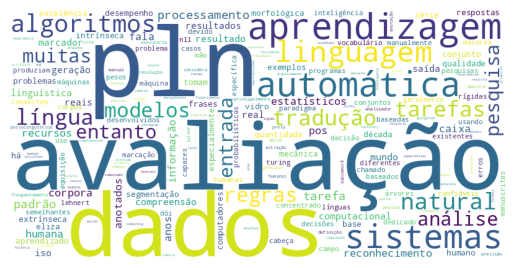

In [17]:
# Gerar nuvem de palavras.
!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color="white") \
    .generate_from_frequencies(bow_wiki)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## One-Hot, BoW e TF-IDF
São técnicas clássicas de vetorização textual:
- Tradicionais baseadas em frequência/ocorrência.
- Produzem representações esparsas e de alta dimensionalidade.
- Não capturam semântica nem contexto.

In [21]:
# Gerar one-hot por token (vocabulário fixo) para um exemplo simples.
import numpy as np

frase = "modelo de análise de dados"
tokens = frase.split()

vocab = ["modelo", "análise", "dados"]
idx = {t:i for i,t in enumerate(vocab)}

onehots = []
for tok in tokens:
    if tok in idx:
        v = np.zeros(len(vocab), dtype=int)
        v[idx[tok]] = 1
        onehots.append((tok, v))

onehots

[('modelo', array([1, 0, 0])),
 ('análise', array([0, 1, 0])),
 ('dados', array([0, 0, 1]))]

In [26]:
# Gerar Bag-of-Words (contagens) para o documento no mesmo vocabulário.
import numpy as np

frase = "modelo de análise de dados com dados"
tokens = frase.split()

vocab = ["modelo", "análise", "dados"]
idx = {t:i for i,t in enumerate(vocab)}

bow = np.zeros(len(vocab), dtype=int)
for tok in tokens:
    if tok in idx:
        bow[idx[tok]] += 1

bow  # [modelo, análise, dados]

array([1, 1, 2])

In [23]:
# calcular TF-IDF para um pequeno corpus usando sklearn.
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "modelo de análise de dados",
    "modelo estatístico aplicado",
    "dados públicos governamentais"
]

vectorizer = TfidfVectorizer(vocabulary=["modelo", "análise", "dados"])
X = vectorizer.fit_transform(corpus)

X.toarray()  # matriz TF-IDF (linhas = documentos, colunas = vocabulário)

array([[0.51785612, 0.68091856, 0.51785612],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ]])